# Cryptography

Cryptography is everywhere in modern life. Every time you send or receive some kind of electronic communication, it will be encrypted in some way. The strength of the encryption will depend on how sensitive the information is. 

## Making codes with code

First, let's look a the simplest type of code: the *substitution cipher*. Here, we simply switch one letter in the alphabet for another. One way of doing this is known as the *Caesar shift cipher*: we shift each letter in the alphabet by some integer. Let's write some code to use this to encrypt a message that I'd like to send to my friend Bob. 

In [1]:
def caesar_shift(message, n=3):
    
    encrypted_message = ""
    
    # iterate over characters in message
    for c in message.lower():
        # check if the character is a letter
        if c.isalpha():
            # here we convert to the ascii representation using ord(), subtract off the 
            # ascii representation of 'a', add on the shift, then find the remainder of division 
            # by 26 (the number of letters in the alphabet), and add back on the ascii representation 
            # of 'a'. We convert it back to a character and add it to our message
            l = (ord(c) - ord('a') + n)% 26 + ord('a')
            encrypted_message += chr(l)
            # add spaces in 
        elif c == ' ':
            encrypted_message += ' '
            
    return encrypted_message

In [2]:
caesar_shift('Hi Bob! How are you?')

'kl ere krz duh brx'

Great! But what if Bob wants to decrypt my message? We need to do the reverse operation:

In [3]:
def decrypt_caesar(encrypted_message, n=3):
    
    message = ""
    
    for c in encrypted_message:
        if c.isalpha():
            l = (ord(c) - ord('a') - n)% 26 + ord('a')
            message += chr(l)
        else:
            message += ' '
            
    return message

In [4]:
encrypted_message = caesar_shift('Hi Bob! How are you?')

decrypt_caesar(encrypted_message)

'hi bob how are you'

## Breaking codes with code

Excellent! Unfortunately a simple encryption like this is pretty easy to break. For example, say our nosy friend Charlie is trying to listen in to our conversation. Charlie could easily just brute force this using a loop over all the possible values of `n` until they hit upon a message that made sense:

In [5]:
for n in range(26):
    print(decrypt_caesar(encrypted_message, n))

kl ere krz duh brx
jk dqd jqy ctg aqw
ij cpc ipx bsf zpv
hi bob how are you
gh ana gnv zqd xnt
fg zmz fmu ypc wms
ef yly elt xob vlr
de xkx dks wna ukq
cd wjw cjr vmz tjp
bc viv biq uly sio
ab uhu ahp tkx rhn
za tgt zgo sjw qgm
yz sfs yfn riv pfl
xy rer xem qhu oek
wx qdq wdl pgt ndj
vw pcp vck ofs mci
uv obo ubj ner lbh
tu nan tai mdq kag
st mzm szh lcp jzf
rs lyl ryg kbo iye
qr kxk qxf jan hxd
pq jwj pwe izm gwc
op ivi ovd hyl fvb
no huh nuc gxk eua
mn gtg mtb fwj dtz
lm fsf lsa evi csy


That took 2 lines and fraction of a second for our computer to break :(. Instead of just shifting the letters, we could instead scramble them in some random order. Fortunately, this is a lot more secure against brute force attacks like this, as now rather than there being 26 different variations for Charlie to brute force, there are $26! > 4 \times 10^{26}$.

## Frequency analysis

However, if we used the same random order each time such that Charlie could build up a longer set of messages, this would still be pretty easy to break using *frequency analysis*. In the English language, the letters used tend to follow a standard frequency distribution, with 'e' being the most common, and 'z' the least common. All Charlie would have to do would be to plot the frequency of each letter in the messages and compare that against the frequency of letters in the English language. It wouldn't take too long to work out which letters were associated with each other. 

Let's try this now.

In [6]:
import numpy as np

def encrypt(message, key):
    
    encrypted_message = ""
    
    for c in message.lower():
        if c.isalpha():
            # convert to integer using the ascii representation
            l = ord(c) - ord('a')
            # look up the new letter in the key
            new_l = key[l]
            
            encrypted_message += chr(new_l + ord('a'))
            
        elif c == ' ':
            encrypted_message += ' '
            
    return encrypted_message

def decrypt(encrypted_message, key):
    
    message = ""
    
    for c in encrypted_message:
        if c.isalpha():
            l = ord(c) - ord('a')
            
            # look up the new letter in the key
            new_l = np.where(key == l)[0]
            
            message += chr(new_l + ord('a'))
            
        else:
            message += ' '
            
    return message
            
            

In [7]:
from numpy.random import permutation

# Here we will define the encryption/decryption key that Bob and I will use for our messages.
# It's a random permutation of the numbers 0-25.
key = permutation(range(26))

In [8]:
encrypted_message = encrypt('hi bob! how are you?', key)
print(encrypted_message)

decrypt(encrypted_message, key)

tf vmv tmz bxw nmu


'hi bob how are you'

Right, we have our encryption and decryption working. Let's see what Charlie might do to try and break it. First, let's plot the standard frequency distribution of letters in English.

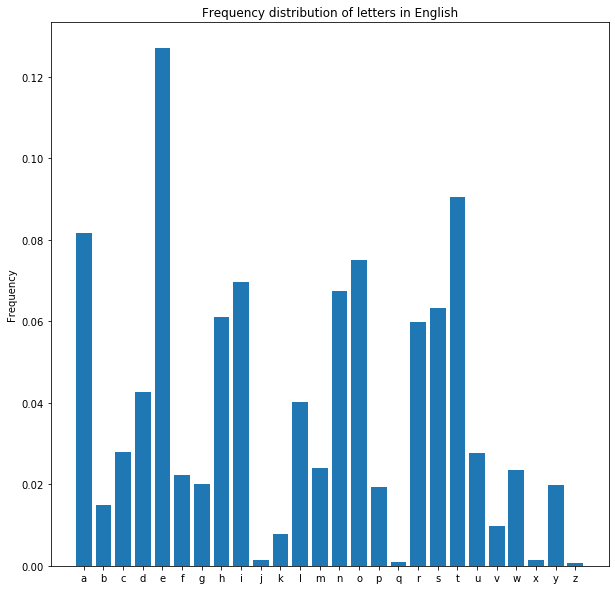

In [9]:
freqs = np.array([8.167,1.492,2.782,4.253,12.702,2.228,2.015,6.094,6.966,0.153,0.772,4.025,2.406,6.749,
         7.507,1.929,0.095,5.987,6.327,9.056,2.758,0.978,2.360,0.150,1.974,0.074]) / 100
 
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))

letters = [chr(n + ord('a')) for n in range(26)]

x_pos = np.arange(26)

ax.bar(x_pos, freqs, align='center');
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in English')

plt.show()

As expected, the frequencies of letters like a, e and t are highest, whereas there are very few j's, q's, x's or z's. Now let's encrypt a longer message and see what happens when we compare the frequency distribution of letters against standard English.

In [10]:
message = "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.Bilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure. And if that was not enough for fame, there was also his prolonged vigour to marvel at. Time wore on, but it seemed to have little effect on Mr. Baggins. At ninety he was much the same as at fifty. At ninety-nine they began to call him well-preserved ; but unchanged would have been nearer the mark. There were some that shook their heads and thought this was too much of a good thing; it seemed unfair that anyone should possess (apparently) perpetual youth as well as (reputedly) inexhaustible wealth.‘It will have to be paid for,’ they said. ‘It isn’t natural, and trouble will come of it!’But so far trouble had not come; and as Mr. Baggins was generous with his money, most people were willing to forgive him his oddities and his good fortune. He remained on visiting terms with his relatives (except, of course, the Sackville-Bagginses), and he had many devoted admirers among the hobbits of poor and unimportant families. But he had no close friends, until some of his younger cousins began to grow up.The eldest of these, and Bilbo’s favourite, was young Frodo Baggins. When Bilbo was ninety-nine he adopted Frodo as his heir, and brought him to live at Bag End; and the hopes of the Sackville-Bagginses were finally dashed. Bilbo and Frodo happened to have the same birthday, September 22nd. ‘You had better come and live here, Frodo my lad,’ said Bilbo one day; ‘and then we can celebrate our birthday-parties comfortably together.’ At that time Frodo was still in his tweens, as the hobbits called the irresponsible twenties between childhood and coming of age at thirty-three.Twelve more years passed. Each year the Bagginses had given very lively combined birthday-parties at Bag End; but now it was understood that something quite exceptional was being planned for that autumn. Bilbo was going to be eleventy-one , 111, a rather curious number, and a very respectable age for a hobbit (the Old Took himself had only reached 130); and Frodo was going to be thirty-three , 33, an important number: the date of his ‘coming of age’."

In [11]:
encrypted_message = encrypt(message, key)
encrypted_message

'ztwy ex vfhvm vbqqfyk mc vbq wyd byymuyiwd atba tw zmuhd ktmxahn vw iwhwvxbafyq tfk whwjwyancfxka vfxatdbn zfat b gbxan mc kgwifbh ebqyfcfiwyiw atwxw zbk euit abhp byd wlifawewya fy tmvvfamyvfhvm zbk jwxn xfit byd jwxn gwiuhfbx byd tbd vwwy atw zmydwx mc atw ktfxw cmx kflan nwbxk wjwx kfyiw tfk xwebxpbvhw dfkbggwbxbyiw byd uywlgwiawd xwauxy atw xfitwk tw tbd vxmuqta vbip cxme tfk axbjwhk tbd ymz vwimew b hmibh hwqwyd byd fa zbk gmguhbxhn vwhfwjwd ztbawjwx atw mhd cmhp efqta kbn atba atw tfhh ba vbq wyd zbk cuhh mc auyywhk kauccwd zfat axwbkuxw byd fc atba zbk yma wymuqt cmx cbew atwxw zbk bhkm tfk gxmhmyqwd jfqmux am ebxjwh ba afew zmxw my vua fa kwwewd am tbjw hfaahw wccwia my ex vbqqfyk ba yfywan tw zbk euit atw kbew bk ba cfcan ba yfywanyfyw atwn vwqby am ibhh tfe zwhhgxwkwxjwd  vua uyitbyqwd zmuhd tbjw vwwy ywbxwx atw ebxp atwxw zwxw kmew atba ktmmp atwfx twbdk byd atmuqta atfk zbk amm euit mc b qmmd atfyq fa kwwewd uycbfx atba bynmyw ktmuhd gmkkwkk bggbxwyahn gwxgwaubh nmuat bk z

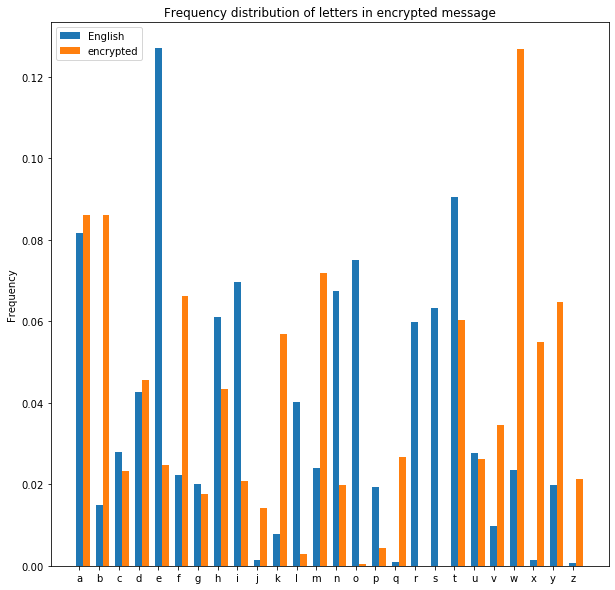

In [12]:
def calc_frequency(text):
    # remove whitespace
    text = text.replace(' ', '')
    n_letters = len(text)
    
    freqs = np.zeros(26)
    
    for c in text:
        freqs[ord(c.lower()) - ord('a')] += 1
        
    freqs /= len(text)
    
    return freqs

encrypted_freqs = calc_frequency(encrypted_message)

fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.35

ax.bar(x_pos, freqs, bar_width, label="English")
ax.bar(x_pos + bar_width, encrypted_freqs, bar_width, label="encrypted")
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in encrypted message')

plt.legend()

plt.show()

Here we can clearly see that the most frequent letters in the encrypted message do not line up with what we'd expect for something in standard English. Let's make a first pass at decrypting the message by assuming that the most common letter in the encrypted message is the same as the most common letter in English, and so on for all the other letters. 

In [13]:
# let's try and reshuffle the letters to see if we can make a first guess for what they should be 

# define a helper function to allow us to sort letters by their frequency
def take_second(elem):
    return elem[1]

sorted_english = sorted(zip(letters, freqs), key=take_second, reverse=True)

sorted_encrypted = sorted(zip(letters, encrypted_freqs), key=take_second, reverse=True)

# create a dictionary which matches up the letters in the encrypted message with letters in 
# standard english that have the same rank when sorted by frequency
letter_pairs = dict(zip([l[0] for l in sorted_encrypted], [l[0] for l in sorted_english]))

decrypted = ""

# use the dictionary of letter pairs to try and decrypt the message
for c in encrypted_message:
    if c.isalpha():
        decrypted += letter_pairs[c]
    else:
        decrypted += ' '

In [14]:
decrypted

'gsen wr cilco cauuinh of cau end annomnyed tsat se gomld hsortlp ce yelecratinu sih eleventpfirht cirtsdap gits a bartp of hbeyial waunifiyenye tsere gah wmys talk and ejyitewent in soccitoncilco gah verp riys and verp beymliar and sad ceen tse gonder of tse hsire for hijtp pearh ever hinye sih rewarkacle dihabbearanye and mnejbeyted retmrn tse riyseh se sad cromust cayk frow sih travelh sad nog ceyowe a loyal leuend and it gah bobmlarlp celieved gsatever tse old folk wiust hap tsat tse sill at cau end gah fmll of tmnnelh htmffed gits treahmre and if tsat gah not enomus for fawe tsere gah alho sih brolonued viuomr to warvel at tiwe gore on cmt it heewed to save little effeyt on wr cauuinh at ninetp se gah wmys tse hawe ah at fiftp at ninetpnine tsep ceuan to yall siw gellbreherved  cmt mnysanued gomld save ceen nearer tse wark tsere gere howe tsat hsook tseir seadh and tsomust tsih gah too wmys of a uood tsinu it heewed mnfair tsat anpone hsomld bohhehh abbarentlp berbetmal pomts ah g

In [15]:
message

'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.Bilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure. And if that was not enough for fame, there was also his prolonged vigour to marvel at. Time wore on, but it seemed to have little effect on Mr. Baggins. At ninety he was much the same as at fifty. At ninety-nine they began to call him well-preserved ; but unchanged would have been nearer the mark. There were some that shook their heads and thought this was too much of a good thing; it seemed unfair that anyone should possess (apparent

Hmmm not great, but good for a first attempt! We can see that even with this pretty simple brute force attempt, we've been able to decrypt the letters e, n, r, l, o, d, i, v, f, k... We can even spot some entire words in there: end, eleven, old, folk, one, frodo, of, live, for... With a little more care, it wouldn't take too long to decrypt the message entirely. Clearly if Bob and I are going to stop Charlie from listening in, we're going to need something more clever than a substitution cipher.

## Vigenère cipher

So we've seen that simply substituting one letter for another (known as a *monoalphabetic cipher*) is pretty easy to crack. Fortunately, there's a fairly straightforward way that we can make this significantly more secure: we can change which letter we use to substitute the other for each time (known as a *polyalphabetic cipher*). So maybe the first time we encrypt the letter *a* it becomes a *y*, the next time it becomes a *u*, the time after that a *k* and so on... This will make the encrypted message much harder to crack through frequency analysis (though as we shall see, often not impossible...)

One of the simplest (and earliest, dating back to the 16th century) examples of a polyalphabetic is the *Vigenère cipher*. At the time, this cipher was so secure that it took three centuries before anyone was able to break it, earning it the name *le chiffre indéchiffrable* (French for 'the indecipherable cipher'). Polyalphabetic ciphers are so secure that they were used right up until the invention of the computers: although much more complex than the cipher we're going to look at here, even the Enigma machines used in the Second World War essentially implemented a polyalphabetic cipher. 

To encrypt a message with the Vigenère cipher, we first start of with a *Vigenère square*:

![](Vigenère_square_shading.svg)

Next, we need to choose a *key* with which to encrypt our message. This is sort of like a password, and just like a password, the longer and more random the key is, the more secure our message will be (so the safer Bob and I's messages will be from Charlie). However, to illustrate the dangers of short, easily guessable passwords, for this example I shall choose the word `PYTHON`. 

We next take our message (or using cryptography lingo, the *plaintext*) and repeat our keyword along its length:

| message | *Watch out! I think Charlie is on to us.* |
| -- | -- |
| plaintext |`WATCHOUTITHINKCHARLIEISONTOUS` |
| key |`PYTHONPYTHONPYTHONPYTHONPYTHO` |

For each letter in the plaintext, we then use the corresponding letter in our key to look up in the table what the encrypted message (or *ciphertext*) should be. So, for the first letter, this would be `L`, for the next `Y`, and so on. Doing this by hand is rather tiresome, so let's get our computer to do it for us! Fortunately, we only have to change a few things in the Caesar shift function we defined before.

In [16]:
def vigenere(plaintext, key):
    ciphertext = ""
    counter = 0 # we're going to use a counter to help keep track of which letter of the key to use
    
    # iterate over characters in message
    for c in plaintext.upper():
        # check if the character is a letter
        if c.isalpha():
            # here we convert to the ascii representation using ord(), subtract off the 
            # ascii representation of 'a', add on the shift, then find the remainder of division 
            # by 26 (the number of letters in the alphabet), and add back on the ascii representation 
            # of 'a'. We convert it back to a character and add it to our message
            l = (ord(c) - ord('A') + ord(key[counter % len(key)].upper()) - ord('A'))% 26 + ord('A')
            ciphertext += chr(l)
            counter += 1
            
    return ciphertext

def decrypt_vigenere(ciphertext, key):
    plaintext = ""
    
    for i, c in enumerate(ciphertext):
        # we decrypt by subtracting off the key rather than adding
        l = (ord(c) - ord('A') - (ord(key[i % len(key)]) - ord('A')))% 26 + ord('A')
        plaintext += chr(l)
        
    return plaintext

In [17]:
message = "Watch out! I think Charlie is on to us."
key = "PYTHON"
ciphertext = vigenere(message, key)
plaintext = decrypt_vigenere(ciphertext, key)

In [18]:
ciphertext

'LYMJVBJRBAVVCIVOOEAGXPGBCRHBG'

In [19]:
plaintext

'WATCHOUTITHINKCHARLIEISONTOUS'

Great! So we've encrypted our message using *le chiffre indéchiffrable*, and Charlie should therefore never be able to read any of Bob and I's messages ever again, right? Sadly, no. For starters, if we have a long enough message and a short enough key, our old friend frequency analysis can work again. Let's see how.

Charlie has discovered that their previous tactic of applying simple frequency analysis to Bob and I's messages no longer works: clearly, we're no longer using a monoalphabetic cipher. They suspect that we may now instead be using a polyalphabetic cipher. The first thing that they can try is to guess the length of the key. If we have a key three letters long, then every 3rd letter will be encrypted using the same substitution alphabet. This means these letters now act like a simple monoalphabetic cipher, and will follow the standard distribution if frequency analysis is applied. 

Let's try that here. First we will encrypt our message, then see what the frequency distribution of the ciphertext looks like. 

In [20]:
message = "AN UNEXPECTED PARTY In a hole in the ground there lived a hobbit. Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort. It had a perfectly round door like a porthole, painted green, with a shiny yellow brass knob in the exact middle. The door opened on to a tube-shaped hall like a tunnel: a very comfortable tunnel without smoke, with panelled walls, and floors tiled and carpeted, provided with polished chairs, and lots and lots of pegs for hats and coats—the hobbit was fond of visitors. The tunnel wound on and on, going fairly but not quite straight into the side of the hill—The Hill, as all the people for many miles round called it—and many little round doors opened out of it, first on one side and then on another. No going upstairs for the hobbit: bedrooms, bathrooms, cellars, pantries (lots of these), wardrobes (he had whole rooms devoted to clothes), kitchens, dining-rooms, all were on the same floor, and indeed on the same passage. The best rooms were all on the left-hand side (going in), for these were the only ones to have windows, deep-set round windows looking over his garden, and meadows beyond, sloping down to the river. This hobbit was a very well-to-do hobbit, and his name was Baggins. The Bagginses had lived in the neighbourhood of The Hill for time out of mind, and people considered them very respectable, not only because most of them were rich, but also because they never had any adventures or did anything unexpected: you could tell what a Baggins would say on any question without the bother of asking him. This is a story of how a Baggins had an adventure, and found himself doing and saying things altogether unexpected. He may have lost the neighbours’ respect, but he gained—well, you will see whether he gained anything in the end. The mother of our particular hobbit—what is a hobbit? I suppose hobbits need some description nowadays, since they have become rare and shy of the Big People, as they call us. They are (or were) a little people, about half our height, and smaller than the bearded dwarves. Hobbits have no beards. There is little or no magic about th'em, except the ordinary everyday sort which helps them to disappear quietly and quickly when large stupid folk like you and me come blundering along, making a noise like elephants which they can hear a mile off. They are inclined to be fat in the stomach; they dress in bright colours (chiefly green and yellow); wear no shoes, because their feet grow natural leathery soles and thick warm brown hair like the stuff on their heads (which is curly); have long clever brown fingers, good-natured faces, and laugh deep fruity laughs (especially after dinner, which they have twice a day when they can get it). Now you know enough to go on with. As I was saying, the mother of this hobbit—of Bilbo Baggins, that is—was the famous Belladonna Took, one of the three remarkable daughters of the Old Took, head of the hobbits who lived across The Water, the small river that ran at the foot of The Hill. It was often said (in other families) that long ago one of the Took ancestors must have taken a fairy wife. That was, of course, absurd, but certainly there was still something not entirely hobbitlike about them, and once in a while members of the Took-clan would go and have adventures. They discreetly disappeared, and the family hushed it up; but the fact remained that the Tooks were not as respectable as the Bagginses, though they were undoubtedly richer. Not that Belladonna Took ever had any adventures after she became Mrs. Bungo Baggins. Bungo, that was Bilbo’s father, built the most luxurious hobbit-hole for her (and partly with her money) that was to be found either under The Hill or over The Hill or across The Water, and there they remained to the end of their days. Still it is probable that Bilbo, her only son, although he looked and behaved exactly like a second edition of his solid and comfortable father, got something a bit queer in his make-up from the Took side, something that only waited for a chance to come out. The chance never arrived, until Bilbo Baggins was grown up, being about fifty years old or so, and living in the beautiful hobbit-hole built by his father, which I have just described for you, until he had in fact apparently settled down immovably. By some curious chance one morning long ago in the quiet of the world, when there was less noise and more green, and the hobbits were still numerous and prosperous, and Bilbo Baggins was standing at his door after breakfast smoking an enormous long wooden pipe that reached nearly down to his woolly toes (neatly brushed)—Gandalf came by. Gandalf! If you had heard only a quarter of what I have heard about him, and I have only heard very little of all there is to hear, you would be prepared for any sort of remarkable tale. Tales and adventures sprouted up all over the place wherever he went, in the most extraordinary fashion. He had not been down that way under The Hill for ages and ages, not since his friend the Old Took died, in fact, and the hobbits had almost forgotten what he looked like. He had been away over The Hill and across The Water on businesses of his own since they were all small hobbit-boys and hobbit-girls. All that the unsuspecting Bilbo saw that morning was an old man with a staff. He had a tall pointed blue hat, a long grey cloak, a silver scarf over which his long white beard hung down below his waist, and immense black boots. 'Good Morning!' said Bilbo, and he meant it. The sun was shining, and the grass was very green. But Gandalf looked at him from under long bushy eyebrows that stuck out further than the brim of his shady hat. 'What do you mean?' he said. 'Do you wish me a good morning, or mean that it is a good morning whether I want it or not; or that you feel good this morning; or that it is a morning to be good on?' 'All of them at once,' said Bilbo. 'And a very fine morning for a pipe of tobacco out of doors, into the bargain. If you have a pipe about you, sit down and have a fill of mine! There’s no hurry, we have all the day before us!' Then Bilbo sat down on a seat by his door, crossed his legs, and blew out a beautiful grey ring of smoke that sailed up into the air without breaking and floated away over The Hill. 'Very pretty!' said Gandalf. 'But I have no time to blow smoke-rings this morning. I am looking for someone to share in an adventure that I am arranging, and it’s very difficult to find anyone."
key = "PYTHON"
ciphertext = vigenere(message, key)

In [21]:
ciphertext[:1000]

'PLNUSKECVASQEYKAMVCYAVZRXLMOSTGMNURGWCKLZVKCWHVBQZBABBIYGHGGNBBYHLLCMOCYTDBSZRSUBAVGWCXURFDDPVFZHYGKOADMSFGZTJEUCENCMHRENZTYSFPLWFVBACPPHUCMMOWAVGGPHGDQBARBLLHUCEIMXHHVIUTZOUDZUPHUDJXHBQIFTAARPLLJCZUMKAWGWYWHDRGDXJHYNPHBBQSMHYZVZCTWCEIFHSSCPGGASQVPXLBJXRAHGUXLRFSYAMPIFNHQDUCOXLMOSRMYVAAVSBELHUTBHVFBECGLRBCRHHHHQCLOOCTBAHZYAGDLOGJLGLZNKCKFQBBDHYHNQJXAIACCEDWGWMNAGZDIXDWGWNTUSYACWDOYAQTURSAMHYGGXJXKOASATYDRICWWFBKGWLRJXRAWCYXQALRPWYBYGNCBEVHFPLWSCGHMYWSTHDHYVNIQTURPDYMZHUTFHIPVIUTZTBCBHMJVHGMVFFIFXAIACCEDCHCBHUOASMGNCVCEYHWEAWUBHADRJBWGTQMYOVVFMPBGDRALGVSCHMHUTFBSZGWCAPZYPQTSZGWCILCCACYVFZPLRTWYTQKVIASATSZRSGMHBQBYGFZVIRELFBJLWKCBGQHWSATBHBHBUGMMWEHRHUCATQBKSNCBMOSADLTUCGWCKUCTDGGNICHRTPFFUMKAVRWMUIWGQCWYCBBQUHHUGMHTGPTJEHFFEYGAFVTQEVHFDDMOSFTUTYREDZXZVRWYWDVBACKVCZHBXCCGTBMVQYDRALGXXRVOSAHBBUWAVPHVAFPJEDSETMGAVRHYFLTYDMKHBQXLWLSQDLMOSFPKXWOFHYZLHUTZXZHEDMFZKRGCTSZBCRALZRURAHBQHGWLUBXLZPBSDPMOSFTUXYSGWCHUZLDLXZHBWYOLKVCBHDGQTCIZSGGMNURJXLWVKFAMHRWAVMOLFUXQZHFQTLTURZTYWVKFQCRVBQHJHWWAVBH

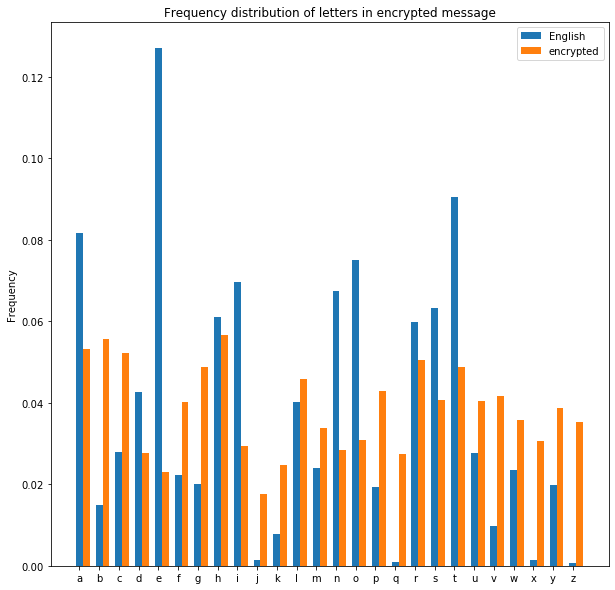

In [22]:
encrypted_freqs = calc_frequency(ciphertext)

fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.35

ax.bar(x_pos, freqs, bar_width, label="English")
ax.bar(x_pos + bar_width, encrypted_freqs, bar_width, label="encrypted")
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in encrypted message')

plt.legend()

plt.show()

As we can see, the distribution of the letters in the ciphertext is a lot more even than in standard english. This is because of the polyalphabetic cipher: as letters in the plaintext can now be encrypted as several different letters, this has a way of 'averaging out' the individual letters in the distribution. 

Ok, so this clearly hasn't worked. So next Charlie tries guessing that we've used a key three letters long, and performs the same analysis just on every third letter in the ciphertext. 

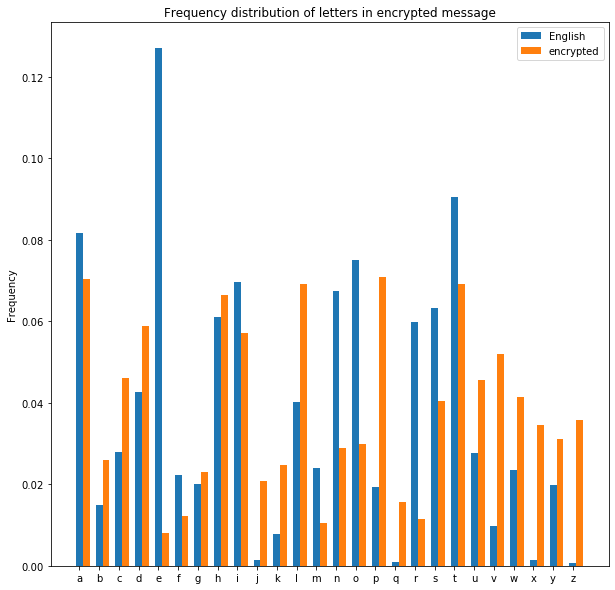

In [23]:
encrypted_freqs = calc_frequency(ciphertext[::3])

fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.35

ax.bar(x_pos, freqs, bar_width, label="English")
ax.bar(x_pos + bar_width, encrypted_freqs, bar_width, label="encrypted")
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in encrypted message')

plt.legend()

plt.show()

Better, but still not quite plain English. Charlie repeats this for different key lengths. Here's what it looks like with the (correct) guess of a key of length 6:

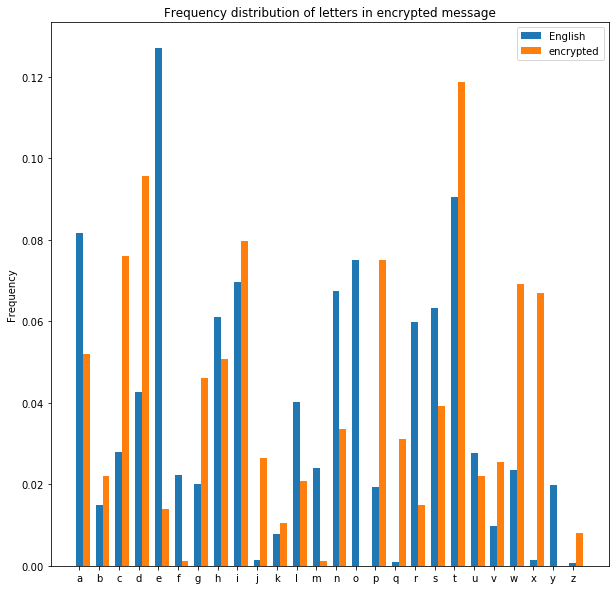

In [24]:
encrypted_freqs = calc_frequency(ciphertext[::6])

fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.35

ax.bar(x_pos, freqs, bar_width, label="English")
ax.bar(x_pos + bar_width, encrypted_freqs, bar_width, label="encrypted")
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in encrypted message')

plt.legend()

plt.show()

Much better! We can see here that the most common letters in the ciphertext (D and T) have frequencies very close to the most common letters in plain English (T and E respectively). From this, Charlie can infer that this set of letters was encrypted with the letter P (A is always encrypted as the key letter, so we can count back from the letter corresponding to E in the ciphertext (T) to find this). All Charlie needs to do now is repeat this for the other 5 letters in the key, and Charlie can both decrypt the message *and* discover the key. This second point is particularly dangerous, as it means that not only can Charlie read our messages, they can also send encrypted messages impersonating us. 

So clearly *le chiffre indéchiffrable* is not quite as unbreakable as first thought. There are ways we can make it more secure though. Firstly, we can use a much longer key. If we have a key that is around the same length as the message itself, then frequency analysis will no longer work. Unfortunately, whilst this sounds great, it's not so practical. What if I want to send Bob a really long message? We should also change our keys often, in case one of them gets compromised. How do I send him the keys beforehand without Charlie getting hold of them? 

Maybe I could choose keys from a preexisting text (a *keytext*) that I know Bob and I will both always have copies of (Harry Potter and the Goblet of Fire)? This gets over the problem of having keys that are two short (it's unlikely we're going to send messages longer than this book), and gets over the problem of having to securely communicate huge lists of keys. 

Well..... sadly this is also fairly breakable. For starters, it's not a huge secret that Bob and I are huge Harry Potter fans, and so if Charlie suspects that we may be using a keytext, it wouldn't take a huge jump for them to suspect we may have chosen one of the Harry Potter books. Say Bob and I have decided we're going to use a different key based off text on a certan page number each day. All Charlie would have to do would be to try keys based on each of the 734 pages (in the US edition of Goblet of Fire) each day until they hit upon one that would work, which probably would take their computer a few seconds at most. 

Ultimately, codes of this type are broken because of the predictability of human behavior. If the key is not secure enough, then codebreakers can simply guess likely keys until they hit upon the correct one. This principle even works for much more sophisticated polyalbatic ciphers. 

In World War II, one of the techniques that was used to break the 'unbreakable' Enigma code was based on guessing the content of the message. Each day, all communications using the Enigma code were sent with machines in a certain configuration. To break the code, the Allies needed to work out which particular machine configuration was being used that day. It was known that German naval submarines used to send out weather reports every day giving their location and the local conditions. When the Allies intercepted a signal, they therefore could try and decrypt the message (and therefore discover the day's machine configuration) by guessing the origin of the signal's location and the local weather conditions (which they had a rough idea of from their weather monitoring service). The predicatable patterns of these communications ultimately meant that even the incredibly sophisticated Enigma code could be broken.